# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [5]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.
tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [6]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [9]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.06649999851360917


### 4. Train your agent
**A few important notes:**

When training the environment, set train_mode=True, so that the line for resetting the environment looks like the following:
env_info = env.reset(train_mode=True)[brain_name]
In this coding environment, you will not be able to watch the agents while they are training. However, after training the agents, you can download the saved model weights to watch the agents on your own machine!

**Learning algorithm - DDPG**
Deep Deterministic Policy Gradient was proposed in Continuous control with deep reinforcement learning (Lillicrap et al, 2015) which is an off policy algorithm. DDPG is an actor critic algorithm and simultaneously learns a function and a policy using two networks. The algorithm also applies experience replay and target networks to stabilize the training. 

**Model architecture**
The Actor network consist of three fully connected layer with batch normalization applied at the first layer. The network maps states to actions. It uses ReLU as activation function except the last layer where it use tanh.

The critic network also consist of three fully connected layer with batchnormalization applied at the first layer. The network maps maps state,action pairs to Q-values. It uses ReLU as activation function in the first two layers and no activation function for the last layer.

**Hyperparameters**
- fc1_units=400 # Number of nodes in the first hidden layer
- fc2_units=300 # Number of nodes in the second hidden layer
- BUFFER_SIZE = int(1e6) # replay buffer size
- BATCH_SIZE = 128 # minibatch size
- GAMMA = 0.99 # discount factor
- TAU = 1e-3 # for soft update of target parameters
- LR_ACTOR = 1e-3 # learning rate of the actor
- LR_CRITIC = 1e-3 # learning rate of the critic
- WEIGHT_DECAY = 0 # L2 weight decay
- LEARN_EVERY = 20 # learning timestep interval
- LEARN_NUM = 10 # number of learning passes
- GRAD_CLIPPING = 1.0 # gradient clipping
- OU_SIGMA = 0.2 # OU noise parameter
- OU_THETA = 0.15 # OU noise parameter
- EPSILON = 1.0 # for epsilon in the noise process (act step)
- EPSILON_DECAY = 1e-6 3 epsilon decay rate
- num_episodes=2500 # maximum number of training episodes
- max_t=1000 # maximum number of timesteps per episode

In [10]:
import numpy as np
import random
import time
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from ddpg_agent import Agent
from unityagents import UnityEnvironment

In [11]:
seed = 11
def ddpg(num_episodes=2500, max_t=1000, print_every=1, actor_weights_name='actor.pth', critic_weights_name='critic.pth'):
    mean_scores = [] # mean scores from each episode
    moving_avgs = [] # moving averages
    best_score = -np.inf
    scores_window = deque(maxlen=100)
    
    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations 
        scores = np.zeros(num_agents)
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True) 
            env_info = env.step(actions)[brain_name]  
            next_states = env_info.vector_observations 
            rewards = env_info.rewards 
            dones = env_info.local_done 
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        duration = time.time() - start_time
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])
        moving_avgs.append(np.mean(scores_window))
        
        if i_episode % print_every == 0:
            print("\rEpisode {} ({}s)\tMean: {:.1f}\tMoving Avg: {:.1f}"\
                  .format(i_episode, round(duration), mean_scores[-1], moving_avgs[-1]))
        if moving_avgs[-1] >= 30.0:
            print("\nEnvironment solved in {:d} episodes.\tAverage score: {:.2f}"\
                 .format(i_episode, moving_avgs[-1]))
            torch.save(agent.actor_local.state_dict(), actor_weights_name)
            torch.save(agent.critic_local.state_dict(), critic_weights_name)
            break
            
    return mean_scores, moving_avgs

In [12]:
import workspace_utils
agent = Agent(state_size=state_size, action_size=action_size, random_seed=seed)
from workspace_utils import active_session
 
with active_session():
    scores, avgs = ddpg(actor_weights_name ='actor.pth', critic_weights_name='critic.pth')

Episode 1 (111s)	Mean: 1.4	Moving Avg: 1.4
Episode 2 (114s)	Mean: 2.7	Moving Avg: 2.0
Episode 3 (115s)	Mean: 3.4	Moving Avg: 2.5
Episode 4 (115s)	Mean: 3.8	Moving Avg: 2.8
Episode 5 (117s)	Mean: 3.2	Moving Avg: 2.9
Episode 6 (117s)	Mean: 4.6	Moving Avg: 3.2
Episode 7 (118s)	Mean: 4.9	Moving Avg: 3.4
Episode 8 (119s)	Mean: 5.0	Moving Avg: 3.6
Episode 9 (120s)	Mean: 6.1	Moving Avg: 3.9
Episode 10 (122s)	Mean: 6.3	Moving Avg: 4.1
Episode 11 (123s)	Mean: 7.5	Moving Avg: 4.4
Episode 12 (124s)	Mean: 9.0	Moving Avg: 4.8
Episode 13 (126s)	Mean: 9.1	Moving Avg: 5.2
Episode 14 (127s)	Mean: 10.2	Moving Avg: 5.5
Episode 15 (129s)	Mean: 10.2	Moving Avg: 5.8
Episode 16 (131s)	Mean: 12.6	Moving Avg: 6.2
Episode 17 (132s)	Mean: 13.5	Moving Avg: 6.7
Episode 18 (134s)	Mean: 16.2	Moving Avg: 7.2
Episode 19 (135s)	Mean: 16.8	Moving Avg: 7.7
Episode 20 (136s)	Mean: 19.3	Moving Avg: 8.3
Episode 21 (140s)	Mean: 19.0	Moving Avg: 8.8
Episode 22 (141s)	Mean: 20.3	Moving Avg: 9.3
Episode 23 (144s)	Mean: 19.5	Mov

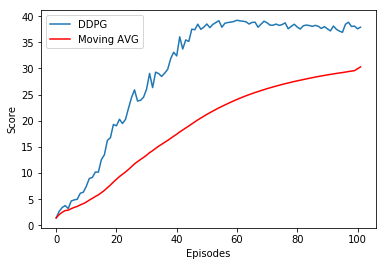

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Moving AVG')
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.legend(loc='upper left');
plt.show()

## Future ideas to improve the agent's performance

We can try using prioritized experience replay and also fine-tuning of hperparameters can lead to better results.